# Crisp Metrics

## Task-2

Supervised Machine Learning - Diabetes Prediction

Dataset Link: https:// www.kaggle.com/rahulsah06/machine

Perform data analysis and use different machine learning algorithms to predict whether a patient is diabetic or not.

Compare at least 3 different algorithms and show their accuracies with the help of a graph.

In [1]:
import warnings
warnings.simplefilter('ignore')

### Importing required libraries -

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
%matplotlib inline

### Loading the dataset -

In [4]:
filepath = r'C:\Users\HP\Desktop\Crisp Metrics\Task-2\diabetes_data.csv'
data = pd.read_csv(filepath)

### Performing EDA -

In [5]:
data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
699,4,118,70,0,0,44.5,0.904,26,0
276,7,106,60,24,0,26.5,0.296,29,1
461,1,71,62,0,0,21.8,0.416,26,0
627,0,132,78,0,0,32.4,0.393,21,0
342,1,0,68,35,0,32.0,0.389,22,0
269,2,146,0,0,0,27.5,0.240,28,1
496,5,110,68,0,0,26.0,0.292,30,0
318,3,115,66,39,140,38.1,0.150,28,0
548,1,164,82,43,67,32.8,0.341,50,0
575,1,119,44,47,63,35.5,0.280,25,0


In [6]:
data.shape

(768, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Checking the outcome labels -

In [9]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

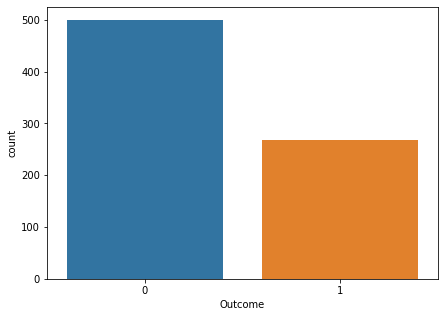

In [10]:
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x='Outcome')
plt.show()

### Checking for null values -

In [11]:
data.isnull().sum().any()

False

### Checking for duplicate rows -

In [12]:
duplicated_rows = data[data.duplicated()]
duplicated_rows.shape

(0, 9)

### Checking the distribution of data - 

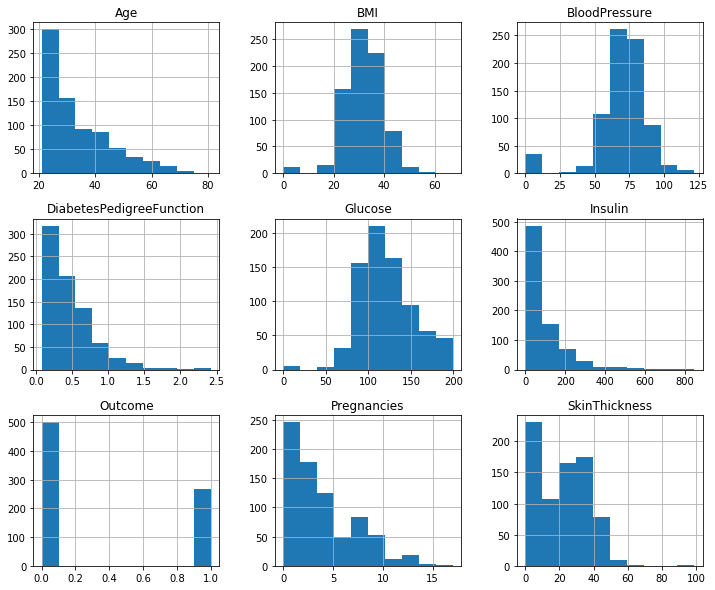

In [13]:
data.hist(figsize=(12, 10))
plt.show()

### Checking Correlation between Dependent and Independent variables -

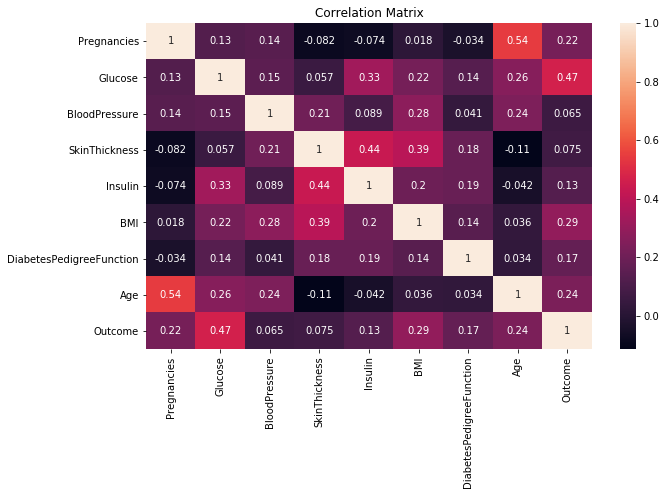

In [14]:
plt.figure(figsize = (10, 6))
cormat = sns.heatmap(data.corr(), annot=True)
cormat.set_title('Correlation Matrix')
plt.show()

### Outlier Detection and Removal -

In [15]:
def diagnostic_plot(data, col):
    plt.figure(figsize=(15, 3))
    
    plt.subplot(1, 3, 1)
    sns.distplot(data[col], bins=10)
    plt.title('Histogram')
    
    plt.subplot(1, 3, 2)
    stats.probplot(data[col], dist='norm', fit=True, plot=plt)
    plt.title('Q-Q Plot')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(y=data[col])
    plt.title('Boxplot')
    
    plt.show()

Checking the 'Pregnancies' column -

In [16]:
data['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [17]:
max_threshold = data['Pregnancies'].quantile(0.95)
data = data[data['Pregnancies']<=max_threshold]

Checking the 'Age' column -

In [18]:
print("Maximum Age is: {}".format(data['Age'].max()))
print("Minimum Age is: {}".format(data['Age'].min()))

Maximum Age is: 81
Minimum Age is: 21


Checking the 'Glucose' column -

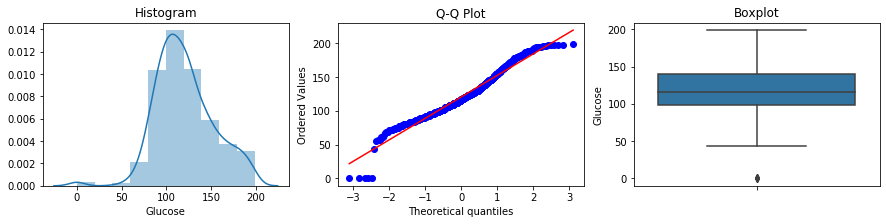

In [19]:
diagnostic_plot(data, 'Glucose')

In [20]:
data = data[data['Glucose']>=25]

Checking the 'BloodPressure' column -

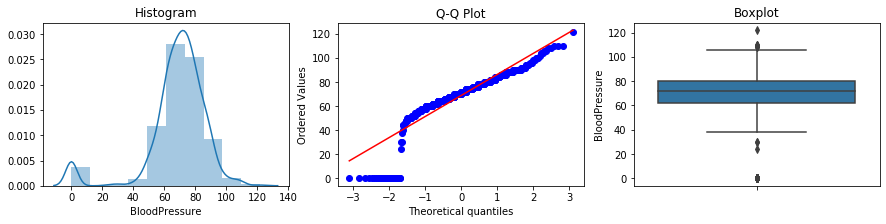

In [21]:
diagnostic_plot(data, 'BloodPressure')

In [22]:
data = data[data['BloodPressure']!=0]

Checking the 'BMI' column -

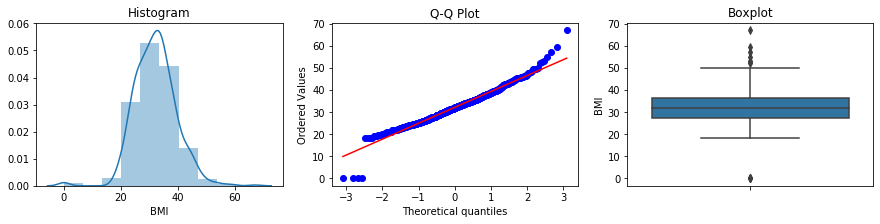

In [23]:
diagnostic_plot(data, 'BMI')

In [24]:
data = data[(data['BMI']>10) & (data['BMI']<50)]

Checking the 'Insulin' column -

In [25]:
data['Insulin'].value_counts().sort_index(ascending=False)

846      1
744      1
600      1
579      1
545      1
      ... 
22       1
18       2
16       1
15       1
0      314
Name: Insulin, Length: 177, dtype: int64

In [26]:
data = data[data['Insulin'].between(15, 600)]

Checking the 'SkinThickness' column -

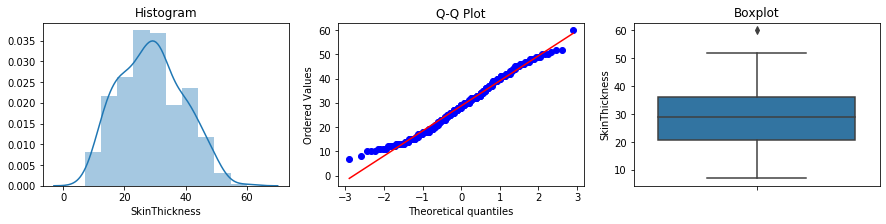

In [27]:
diagnostic_plot(data, 'SkinThickness')

In [28]:
data = data[data['SkinThickness']<60]

Checking the 'DiabetesPedigreeFunction' column -

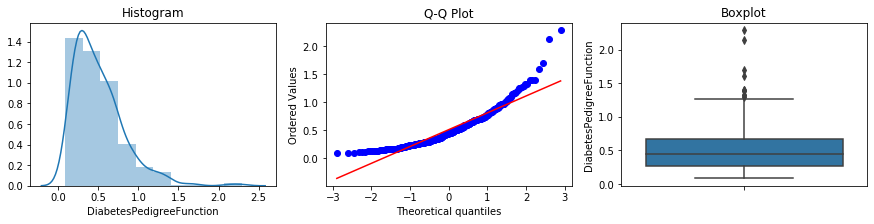

In [29]:
diagnostic_plot(data, 'DiabetesPedigreeFunction')

In [30]:
data.shape

(367, 9)

### Seperating Dependent and Independent variables -

In [31]:
X = data.drop(['Outcome'], axis=1)
y = data['Outcome']

### Performing train-test split -

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### Scaling the data -

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Checking the Accuracy Scores for 3 different models -

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline
pipeline_lr = Pipeline([('lr', LogisticRegression())])
pipeline_svc = Pipeline([('svc', SVC())])
pipeline_dt = Pipeline([('dt', DecisionTreeClassifier())])

pipelines = [pipeline_lr, pipeline_svc, pipeline_dt]
best_acc = 0
best_clf = 0
best_pipeline=""
pipe_dict = {0: 'Logistic Regression', 1: 'Support Vector Classifier', 2: 'Decision Tree Classifier'}

for pipe in pipelines:
    pipe.fit(X_train, y_train)
    
for i, model in enumerate(pipelines):
    print("{} - Test Accuracy: {}".format(pipe_dict[i], model.score(X_test, y_test)))
    
for i, model in enumerate(pipelines):
    if model.score(X_test, y_test)>best_acc:
        best_acc = model.score(X_test, y_test)
        best_pipeline = model
        best_clf = i
print("Classifier with best accuracy is {}". format(pipe_dict[best_clf]))

Logistic Regression - Test Accuracy: 0.7702702702702703
Support Vector Classifier - Test Accuracy: 0.7432432432432432
Decision Tree Classifier - Test Accuracy: 0.7297297297297297
Classifier with best accuracy is Logistic Regression


### Importing Performance Metrics for Classification -

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [37]:
print("Train accuracy :{}".format(accuracy_score(y_train, lr.predict(X_train))))
print("Test accuracy :{}".format(accuracy_score(y_test, lr.predict(X_test))))

Train accuracy :0.8156996587030717
Test accuracy :0.7702702702702703


In [38]:
y_pred_lr = lr.predict(X_test)

In [39]:
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]

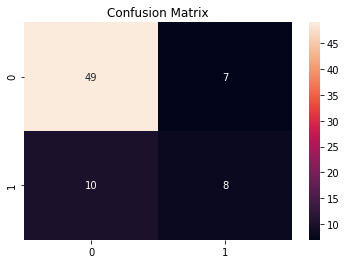

In [40]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True)
plt.title("Confusion Matrix")
plt.show()

In [41]:
print("Classification Report")
print(classification_report(y_test, y_pred_lr))

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        56
           1       0.53      0.44      0.48        18

    accuracy                           0.77        74
   macro avg       0.68      0.66      0.67        74
weighted avg       0.76      0.77      0.76        74



In [42]:
print("AUC Score: {}".format(roc_auc_score(y_test, y_pred_proba_lr)))

AUC Score: 0.861111111111111


In [43]:
from sklearn.model_selection import cross_val_score
lr_acc = np.mean(cross_val_score(lr, X, y, cv=10, scoring='accuracy')) 
print("Cross Validation accuracy: {}".format(lr_acc))

Cross Validation accuracy: 0.7822822822822822


## Support Vector Classifier

In [44]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X_train, y_train)

SVC(probability=True)

In [45]:
print("Train accuracy :{}".format(accuracy_score(y_train, svc.predict(X_train))))
print("Test accuracy :{}".format(accuracy_score(y_test, svc.predict(X_test))))

Train accuracy :0.8532423208191127
Test accuracy :0.7432432432432432


In [46]:
y_pred_svc = svc.predict(X_test)

In [47]:
y_pred_proba_svc = svc.predict_proba(X_test)[:, 1]

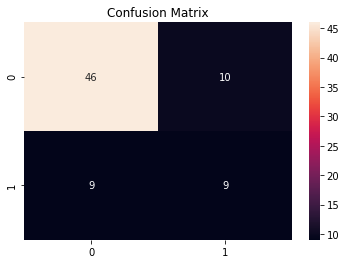

In [48]:
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True)
plt.title("Confusion Matrix")
plt.show()

In [49]:
print("Classification Report")
print(classification_report(y_test, y_pred_svc))

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        56
           1       0.47      0.50      0.49        18

    accuracy                           0.74        74
   macro avg       0.66      0.66      0.66        74
weighted avg       0.75      0.74      0.75        74



In [50]:
print("AUC Score: {}".format(roc_auc_score(y_test, y_pred_proba_svc)))

AUC Score: 0.7876984126984127


In [51]:
from sklearn.model_selection import cross_val_score
svc_acc = np.mean(cross_val_score(svc, X, y, cv=10, scoring='accuracy')) 
print("Cross Validation accuracy: {}".format(svc_acc))

Cross Validation accuracy: 0.7907657657657656


## Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
print("Train accuracy :{}".format(accuracy_score(y_train, dt.predict(X_train))))
print("Test accuracy :{}".format(accuracy_score(y_test, dt.predict(X_test))))

Train accuracy :1.0
Test accuracy :0.7702702702702703


In [54]:
y_pred_dt = dt.predict(X_test)

In [55]:
y_pred_proba_dt = dt.predict_proba(X_test)[:, 1]

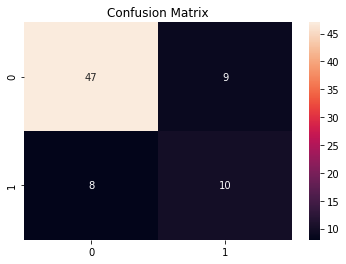

In [56]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True)
plt.title("Confusion Matrix")
plt.show()

In [57]:
print("Classification Report")
print(classification_report(y_test, y_pred_dt))

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.84      0.85        56
           1       0.53      0.56      0.54        18

    accuracy                           0.77        74
   macro avg       0.69      0.70      0.69        74
weighted avg       0.77      0.77      0.77        74



In [58]:
print("AUC Score: {}".format(roc_auc_score(y_test, y_pred_proba_dt)))

AUC Score: 0.6974206349206349


In [59]:
from sklearn.model_selection import cross_val_score
dt_acc = np.mean(cross_val_score(dt, X, y, cv=10, scoring='accuracy')) 
print("Cross Validation accuracy: {}".format(dt_acc))

Cross Validation accuracy: 0.7415915915915916


### Plotting ROC Curve for all 3 models to compare their accuracies -

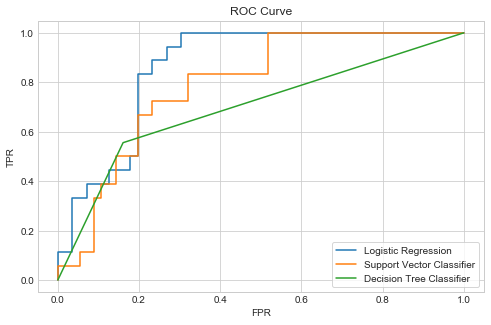

In [60]:
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, y_pred_proba_lr)
fpr_svc, tpr_svc, threshold_svc = roc_curve(y_test, y_pred_proba_svc)
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test, y_pred_proba_dt)

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8, 5))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_svc, tpr_svc, label="Support Vector Classifier")
plt.plot(fpr_dt, tpr_dt, label="Decision Tree Classifier")

plt.legend(loc='lower right', frameon=True)
plt.title("ROC Curve")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()

### Tuning the Hyperparameter 'C' for Logistic Regression -

In [61]:
from sklearn.model_selection import GridSearchCV

params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(estimator=lr, param_grid=params, cv=10, scoring='accuracy', n_jobs=-1)
grid.fit(X,y)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy')

In [62]:
grid.best_params_

{'C': 0.0001}

In [63]:
grid.best_score_

0.796021021021021

### Tuning the Hyperparameters 'C', 'kernel' & 'degree' for Support Vector Classifier -

In [64]:
from sklearn.model_selection import RandomizedSearchCV

params = { 'C': [1, 10, 100, 1000],
           'kernel': ['poly'],
           'degree': [2, 3, 4],
         }

random = RandomizedSearchCV(svc, param_distributions=params, cv=10, scoring='accuracy', n_jobs=-1)
random.fit(X,y)

RandomizedSearchCV(cv=10, estimator=SVC(probability=True), n_jobs=-1,
                   param_distributions={'C': [1, 10, 100, 1000],
                                        'degree': [2, 3, 4],
                                        'kernel': ['poly']},
                   scoring='accuracy')

In [65]:
random.best_params_

{'kernel': 'poly', 'degree': 2, 'C': 1}

In [66]:
random.best_score_

0.7957957957957957

### Tuning the Hyperparameters for Decision Tree -

In [67]:
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [3, 4, 5],
           'min_samples_split': [2, 3],
           'min_samples_leaf': [1, 2, 3]}

grid = GridSearchCV(estimator=dt, param_grid=params, cv=10, scoring='accuracy', n_jobs=-1)
grid.fit(X,y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3]},
             scoring='accuracy')

In [68]:
grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 3}

In [69]:
grid.best_score_

0.7798048048048049

# THANK YOU